# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

# 1 Region and Domain

State the region and the domain category that your data sets are about

    Ann Arbor, Michigan, United States
    Sports and Athletics

# 2 Research Question

You must state a question about the domain category and region that you identified as being interesting

    How have the win percentages for the four major Detroit sports teams (The Detroit Pistons, The Red
    Wings, The Detroit Tigers, and The Detroit Lions) change over the last forty years?

# 3 Links

You must provide at least two links to publicly accessible datasets. These could be links to
files such as CSV or Excel files, or links to websites which might have data in tabular form,
such as Wikipedia pages.

- https://en.wikipedia.org/wiki/List_of_Detroit_Pistons_seasons
- https://en.wikipedia.org/wiki/List_of_Detroit_Red_Wings_seasons
- https://en.wikipedia.org/wiki/List_of_Detroit_Tigers_seasons
- https://en.wikipedia.org/wiki/List_of_Detroit_Lions_seasons

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.colors as col
import matplotlib.cm as cm
import seaborn as sns
import re

# %matplotlib notebook

plt.style.use('seaborn-v0_8-colorblind')

In [2]:
dict_datasets={
    "Tigers":"view-source_https___en.wikipedia.org_wiki_List_of_Detroit_Tigers_seasons.html",
    "Lions":"view-source_https___en.wikipedia.org_wiki_List_of_Detroit_Lions_seasons#Seasons.html",
    "Pistons":"view-source_https___en.wikipedia.org_wiki_List_of_Detroit_Pistons_seasons.html",
    "RedWings":"view-source_https___en.wikipedia.org_wiki_List_of_Detroit_Red_Wings_seasons.html",
}

In [3]:
df_lions=pd.read_html(dict_datasets['Lions'])[1][6:95]

In [4]:
df_lions.head()

Season  Team League Conference Division Regular season  \
   Season  Team League Conference Division         Finish   
6    1934  1934    NFL        NaN  Western            2nd   
7    1935  1935    NFL        NaN  Western            1st   
8    1936  1936    NFL        NaN  Western            3rd   
9    1937  1937    NFL        NaN  Western          T–2nd   
10   1938  1938    NFL        NaN  Western            2nd   

                                                                             \
   .mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}W   
6                                                  10                         
7                                                   7                         
8                                                   8                         
9                                                   7                         
10                                                  7                         

                                    Postseason results Awards  \
    L  T   Pct                      Postseason results Awards   
6   3  0  .769                                     NaN    NaN   
7   3  2  .667  Won NFL Championship (1) (Giants) 26–7    NaN   
8   4  0  .667                                     NaN    NaN   
9   4  0  .636                                     NaN    NaN   
10  4  0  .636                                     NaN    NaN   

            Head coaches Ref.  
            Head coaches Ref.  
6   George "Potsy" Clark  NaN  
7   George "Potsy" Clark  NaN  
8   George "Potsy" Clark  NaN  
9            Dutch Clark  NaN  
10           Dutch Clark  NaN

In [5]:
df_lions['Season']['Season']

6     1934
7     1935
8     1936
9     1937
10    1938
      ... 
90    2018
91    2019
92    2020
93    2021
94    2022
Name: Season, Length: 89, dtype: object

In [6]:
lions=pd.DataFrame()
lions['Year']=df_lions['Season']['Season']

In [7]:
df_lions.rename(columns = {'.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}W': 'W'}, inplace=True)

In [8]:
lions['Wins']=df_lions['Regular season']['W'].astype(int)

In [9]:
lions['Losses']=df_lions['Regular season']['L'].astype(int)

In [10]:
lions['Win %_Lions']=lions['Wins']/(lions['Wins']+lions['Losses'])

In [11]:
lions

,Year,Wins,Losses,Win %_Lions
6,1934,10,3,0.769231
7,1935,7,3,0.700000
8,1936,8,4,0.666667
9,1937,7,4,0.636364
10,1938,7,4,0.636364
...,...,...,...,...
90,2018,6,10,0.375000
91,2019,3,12,0.200000
92,2020,5,11,0.312500
93,2021,3,13,0.187500


In [12]:
df_pistons=pd.read_html(dict_datasets['Pistons'])[1][11:]

In [13]:
df_pistons.rename(columns = {'.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Season': 'Season'}, inplace=True)

In [14]:
df_pistons.head()

,Season,Team,Conference,Finish,Division,Finish.1,Wins,Losses,Win%,GB,Playoffs,Awards,Head Coach
11,1950–51,1950–51,—,NaN,Western,3rd,32,36,.471,12,Lost Division semifinals (Royals) 2–1,NaN,Murray Mendenhall
12,1951–52,1951–52,—,NaN,Western,4th,29,37,.439,12,Lost Division semifinals (Royals) 2–0,NaN,Paul Birch
13,1952–53,1952–53,—,NaN,Western,3rd,36,33,.522,11.5,Won Division semifinals (Royals) 2–1 Lost Div...,Don Meineke (ROY),Paul Birch
14,1953–54,1953–54,—,NaN,Western,3rd,40,32,.556,6,Lost Round-Robin (Royals) 2–0 Lost Round-Robi...,NaN,Paul Birch
15,1954–55,1954–55,—,NaN,Western,1st,43,29,.597,—,Won Division finals (Lakers) 3–1 Lost NBA Fin...,NaN,Charley Eckman


In [15]:
pistons=pd.DataFrame()
pistons['Year']=df_pistons['Season'].str[:4]
pistons[['Wins','Losses']]=df_pistons[['Wins','Losses']]
pistons['Wins'] = pd.to_numeric(pistons['Wins'], errors='coerce')
pistons['Losses'] = pd.to_numeric(pistons['Losses'], errors='coerce')

pistons['Win %_Pistons']=pistons['Wins']/(pistons['Wins']+pistons['Losses'])

In [16]:
pistons

,Year,Wins,Losses,Win %_Pistons
11,1950,32.0,36.0,0.470588
12,1951,29.0,37.0,0.439394
13,1952,36.0,33.0,0.521739
14,1953,40.0,32.0,0.555556
15,1954,43.0,29.0,0.597222
...,...,...,...,...
80,2018,41.0,41.0,0.500000
81,2019,20.0,46.0,0.303030
82,2020,20.0,52.0,0.277778
83,2021,23.0,59.0,0.280488


In [17]:
df_tigers=pd.read_html(dict_datasets['Tigers'])[1]

In [18]:
df_tigers

,Season,Level,League,Division,Finish,Wins,Losses,Win%,GB,Post-Season,Awards,Unnamed: 11
0,1901,MLB,AL,NaN,3rd,74,61,.548,8½,NaN,NaN,NaN
1,1902,MLB,AL,NaN,7th,52,83,.385,30½,NaN,NaN,NaN
2,1903,MLB,AL,NaN,5th,65,71,.478,25,NaN,NaN,NaN
3,1904,MLB,AL,NaN,7th,62,90,.408,32,NaN,NaN,NaN
4,1905,MLB,AL,NaN,3rd,79,74,.516,15½,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
122,2022,MLB,AL,Central,4th,66,96,.407,26,NaN,NaN,NaN
123,Totals,Totals,Totals,Totals,Totals,Totals,Wins,Losses,Win%,NaN,NaN,NaN
124,Totals,Totals,Totals,Totals,Totals,Totals,9512,9407,.503,All-time regular season record (1901–2022),All-time regular season record (1901–2022),All-time regular season record (1901–2022)
125,Totals,Totals,Totals,Totals,Totals,Totals,57,62,.479,All-time postseason record,All-time postseason record,All-time postseason record


In [19]:
tigers=pd.DataFrame()

In [20]:
tigers[['Year','Wins','Losses']]=df_tigers[['Season','Wins','Losses']].copy()

In [21]:
tigers['Year']=tigers['Year'].astype(str)
tigers['Year']=tigers['Year'].astype(object)
tigers['Wins'] = pd.to_numeric(tigers['Wins'], errors='coerce')
tigers['Losses'] = pd.to_numeric(tigers['Losses'], errors='coerce')

In [22]:
tigers['Win %_Tigers']=tigers['Wins']/(tigers['Wins']+tigers['Losses'])

In [23]:
tigers = tigers[tigers['Year'] != "Totals"]

In [24]:
tigers

,Year,Wins,Losses,Win %_Tigers
0,1901,74.0,61.0,0.548148
1,1902,52.0,83.0,0.385185
2,1903,65.0,71.0,0.477941
3,1904,62.0,90.0,0.407895
4,1905,79.0,74.0,0.516340
...,...,...,...,...
118,2018,64.0,98.0,0.395062
119,2019,47.0,114.0,0.291925
120,2020,23.0,35.0,0.396552
121,2021,77.0,85.0,0.475309


In [25]:
df_redw=pd.read_html(dict_datasets['RedWings'])[2][1:100]

In [26]:
df_redw.rename(columns = {'Regular season[3][6][7][8]': 'Regular season'}, inplace=True)

In [27]:
redw=pd.DataFrame()
redw['Year']=df_redw['NHL season']['NHL season'].str[:4]
redw[['Wins','Losses']]=df_redw['Regular season'][['W','L']]
redw=redw.set_index('Year')

In [28]:
redw

,Wins,Losses
Year,,
1926,12,28
1927,19,19
1928,19,16
1929,14,24
Detr,Detroit Falcons[c],Detroit Falcons[c]
...,...,...
2018,32,40
2019,17,49
2020,19,27


In [29]:
# missing 2004
redw.loc['2004',['Wins','Losses']]=redw.loc['2003'][['Wins','Losses']]

redw['Wins'] = pd.to_numeric(redw['Wins'], errors='coerce')
redw['Losses'] = pd.to_numeric(redw['Losses'], errors='coerce')

redw['Win %_RedWings']=redw['Wins']/(redw['Wins']+redw['Losses'])
redw=redw.reset_index() 

In [30]:
redw = redw[redw['Year'] != 'Detr']
redw.reset_index(drop=True, inplace=True)

In [31]:
redw

,Year,Wins,Losses,Win %_RedWings
0,1926,12.0,28.0,0.300000
1,1927,19.0,19.0,0.500000
2,1928,19.0,16.0,0.542857
3,1929,14.0,24.0,0.368421
4,1930,16.0,21.0,0.432432
...,...,...,...,...
92,2018,32.0,40.0,0.444444
93,2019,17.0,49.0,0.257576
94,2020,19.0,27.0,0.413043
95,2021,32.0,40.0,0.444444


In [32]:
# Merge data for visualize
Big4_Michigan=pd.merge(lions.drop(['Wins','Losses'], axis=1),tigers.drop(['Wins','Losses'], axis=1),on='Year')
Big4_Michigan=pd.merge(Big4_Michigan,pistons.drop(['Wins','Losses'], axis=1),on='Year')
Big4_Michigan=pd.merge(Big4_Michigan,redw.drop(['Wins','Losses'], axis=1),on='Year')

In [33]:
Big4_Michigan

,Year,Win %_Lions,Win %_Tigers,Win %_Pistons,Win %_RedWings
0,1950,0.500000,0.616883,0.470588,0.771930
1,1951,0.636364,0.474026,0.439394,0.758621
2,1952,0.750000,0.324675,0.521739,0.692308
3,1953,0.833333,0.389610,0.555556,0.660714
4,1954,0.818182,0.441558,0.597222,0.711864
...,...,...,...,...,...
69,2018,0.375000,0.395062,0.500000,0.444444
70,2019,0.200000,0.291925,0.303030,0.257576
71,2020,0.312500,0.396552,0.277778,0.413043
72,2021,0.187500,0.475309,0.280488,0.444444


In [34]:
Big4_Michigan[40:]

,Year,Win %_Lions,Win %_Tigers,Win %_Pistons,Win %_RedWings
40,1989,0.437500,0.364198,0.719512,0.424242
41,1990,0.375000,0.487654,0.609756,0.472222
42,1991,0.750000,0.518519,0.585366,0.632353
43,1992,0.312500,0.462963,0.487805,0.626667
44,1993,0.625000,0.524691,0.243902,0.605263
45,1994,0.562500,0.460870,0.341463,0.750000
46,1995,0.625000,0.416667,0.560976,0.826667
47,1996,0.312500,0.327160,0.658537,0.593750
48,1997,0.562500,0.487654,0.451220,0.656716
49,1998,0.312500,0.401235,0.580000,0.573333


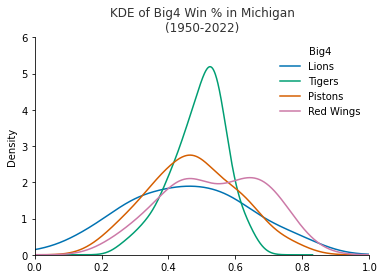

In [35]:
# %matplotlib notebook
# Draw KDE
kde=Big4_Michigan.plot.kde()
[kde.spines[loc].set_visible(False) for loc in ['top', 'right']]
kde.axis([0,1,0,6])
kde.set_title('KDE of Big4 Win % in Michigan\n(1950-2022)',alpha=0.8)
kde.legend(['Lions','Tigers','Pistons','Red Wings'],loc = 'best',frameon=False, title='Big4', fontsize=10)

<IPython.core.display.Javascript object>


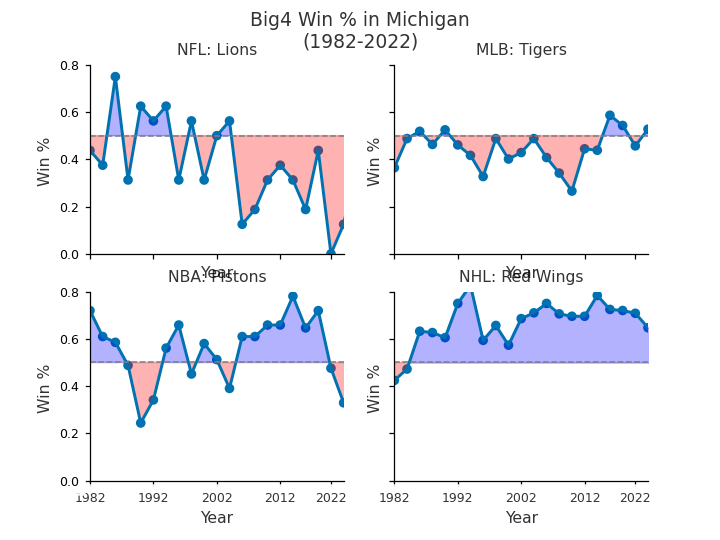

In [36]:
%matplotlib notebook

Big4_Michigan_0019=Big4_Michigan[40:]
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
axs=[ax1,ax2,ax3,ax4]

fig.suptitle('Big4 Win % in Michigan\n(1982-2022)',alpha=0.8);

# Properties
columns_w=['Win %_Lions','Win %_Tigers','Win %_Pistons','Win %_RedWings']
colors=['g','b','y','r']
titles=['NFL: Lions','MLB: Tigers','NBA: Pistons','NHL: Red Wings']
axis=[0,20,0,0.8]

y=0.5

for i in range(len(axs)):
    
    ax=axs[i]
    
    ax = sns.pointplot(x=Big4_Michigan_0019['Year'], y=Big4_Michigan_0019[columns_w[i]], scale=0.7, ax=ax)
    ax.axhline(y=0.5, color='gray', linewidth=1, linestyle='--')
    ax.fill_between(range(len(Big4_Michigan_0019)), 0.5, Big4_Michigan_0019[columns_w[i]], where=(Big4_Michigan_0019[columns_w[i]] < y), color='red', interpolate=True, alpha=0.3)
    ax.fill_between(range(len(Big4_Michigan_0019)), 0.5, Big4_Michigan_0019[columns_w[i]], where=(Big4_Michigan_0019[columns_w[i]] > y), color='blue', interpolate=True, alpha=0.3)
    
    # Beautify the plot
    [ax.spines[loc].set_visible(False) for loc in ['top', 'right']] # Turn off some plot rectangle spines
    ax.set_ylabel('Win % ', alpha=0.8)
    ax.set_xlabel('Year', alpha=0.8)
    ax.set_title(titles[i], fontsize=10, alpha=0.8)
    ax.axis(axis)
    ax.set_xticks(np.append(np.arange(0, 20, 5),19)) 
    ax.set_xticklabels(['1982','1992','2002','2012','2022'], fontsize=8, alpha=0.8)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(8)
        label.set_bbox(dict(facecolor='white',edgecolor='white',  alpha=0.8))

plt.show()